In [1]:
import cirq
import numpy as np
import scipy as sp
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, Math
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
import pandas as pd

# 1) Implement Deutsch's algoritm for 1-bit function

## Case 1: Constant, $f(x)=0$

0: ───H───H───M───

1: ───H───────────


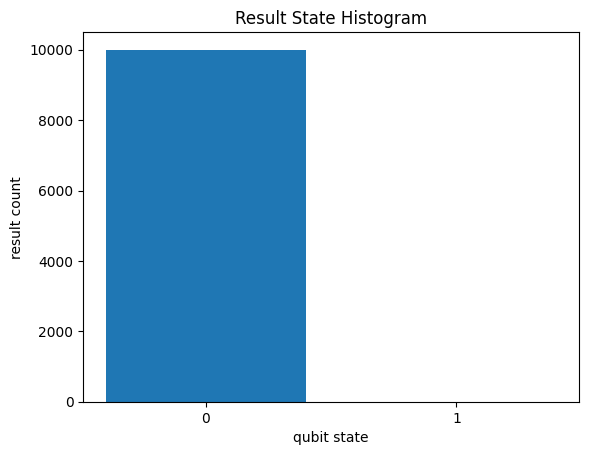

In [12]:
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.H.on(qubits[1]))
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.measure(qubits[0]))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

## Case 2: Constant, $f(x)=1$

0: ───H───H───M───

1: ───X───H───────


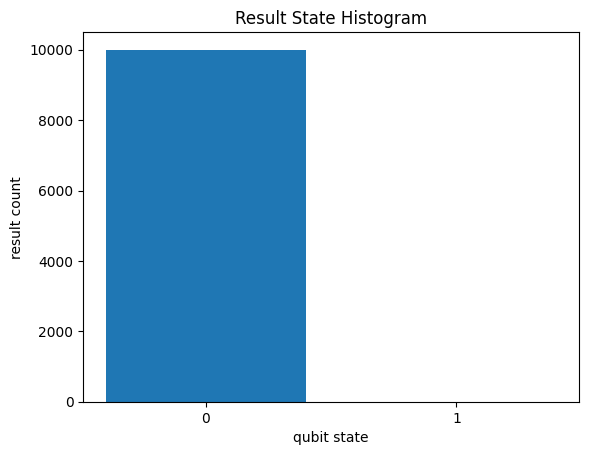

In [9]:
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)
my_circuit.append(cirq.X.on(qubits[1]))
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.H.on(qubits[1]))
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.measure(qubits[0]))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

## Case 3: Non-constant, $f(x)=x$

0: ───H───────@───H───M───
              │
1: ───X───H───X───────────


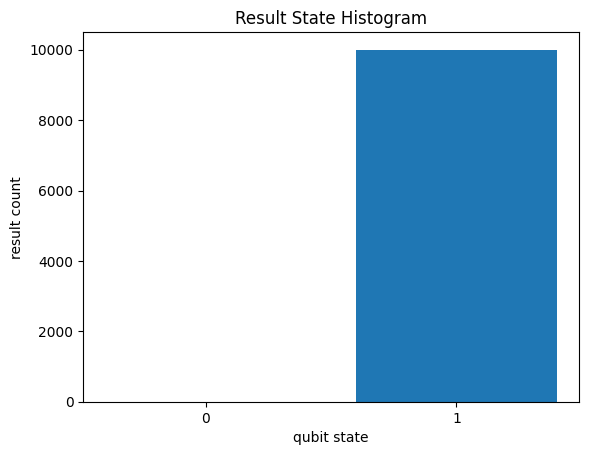

In [8]:
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)
my_circuit.append(cirq.X.on(qubits[1]))
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.H.on(qubits[1]))
my_circuit.append(cirq.CNOT.on(*qubits))
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.measure(qubits[0]))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

## Case 4: Non-constant, $f(x)= \sim x$

0: ───H───X───@───H───M───
              │
1: ───X───H───X───────────


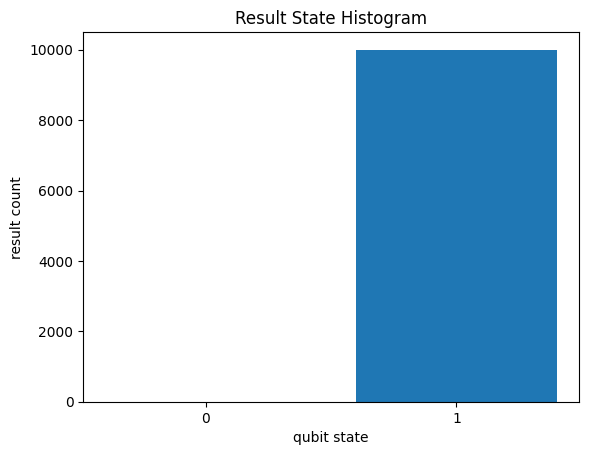

In [13]:
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(2)
my_circuit.append(cirq.X.on(qubits[1]))
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.H.on(qubits[1]))
my_circuit.append(cirq.X.on(qubits[0]))
my_circuit.append(cirq.CNOT.on(*qubits))
my_circuit.append(cirq.H.on(qubits[0]))
my_circuit.append(cirq.measure(qubits[0]))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

# 2) Construct Deutsch-Jozsa algorithm for $n=3$ qubits

## a. Constant function where $f(x)=0$

0: ───H───H───M───────

1: ───H───H───M───────

2: ───H───H───M───────

3: ───X───H───H───X───


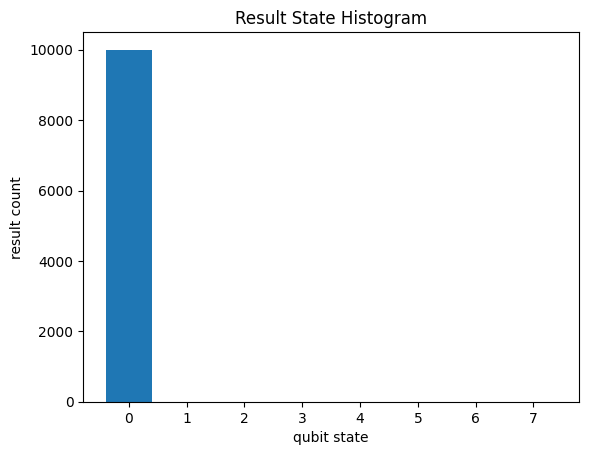

In [23]:
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(4)
for i in range(3):
    my_circuit.append(cirq.H.on(qubits[i]))
my_circuit.append(cirq.X.on(qubits[-1]))
my_circuit.append(cirq.H.on(qubits[-1]))
my_circuit.append(cirq.H.on(qubits[-1]))
my_circuit.append(cirq.X.on(qubits[-1]))
for i in range(3):
    my_circuit.append(cirq.H.on(qubits[i]))
    my_circuit.append(cirq.measure(qubits[i]))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

## Non-constant function where $f(x) = x_1 \oplus x_2$

              ┌──┐
0: ───H────────@─────H───M───────
               │
1: ───H────────┼─────@───H───M───
               │     │
2: ───H───H────┼M────┼───────────
               │     │
3: ───X───H────X─────X───H───X───
              └──┘


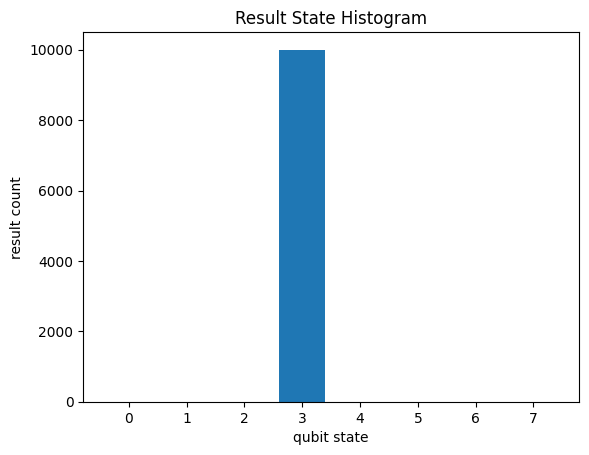

In [37]:
my_circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(4)
for i in range(3):
    my_circuit.append(cirq.H.on(qubits[i]))
my_circuit.append(cirq.X.on(qubits[-1]))
my_circuit.append(cirq.H.on(qubits[-1]))
my_circuit.append(cirq.CNOT.on(qubits[0], qubits[-1]))
my_circuit.append(cirq.CNOT.on(qubits[1], qubits[-1]))
my_circuit.append(cirq.H.on(qubits[-1]))
my_circuit.append(cirq.X.on(qubits[-1]))
for i in range(3):
    my_circuit.append(cirq.H.on(qubits[i]))
    my_circuit.append(cirq.measure(qubits[i]))
print(my_circuit)
result = cirq.Simulator().run(my_circuit, repetitions=10000)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()